In [80]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from math import *
from itertools import product

In [81]:
rng = np.random.default_rng(3123)
a, b, c, d = rng.uniform(-3, 3, 4)
fs = map(np.vectorize, [lambda x: a*x**3 + b*x**2 + c*x + d, lambda x: x*sin(2*pi*x)])

In [82]:
Ns = [40, 100]
epsilon0s = [.2, 1]
epsilon_rngs = [rng.normal, rng.uniform]

In [83]:
pr = tuple(product(Ns, epsilon0s, fs, epsilon_rngs))

16


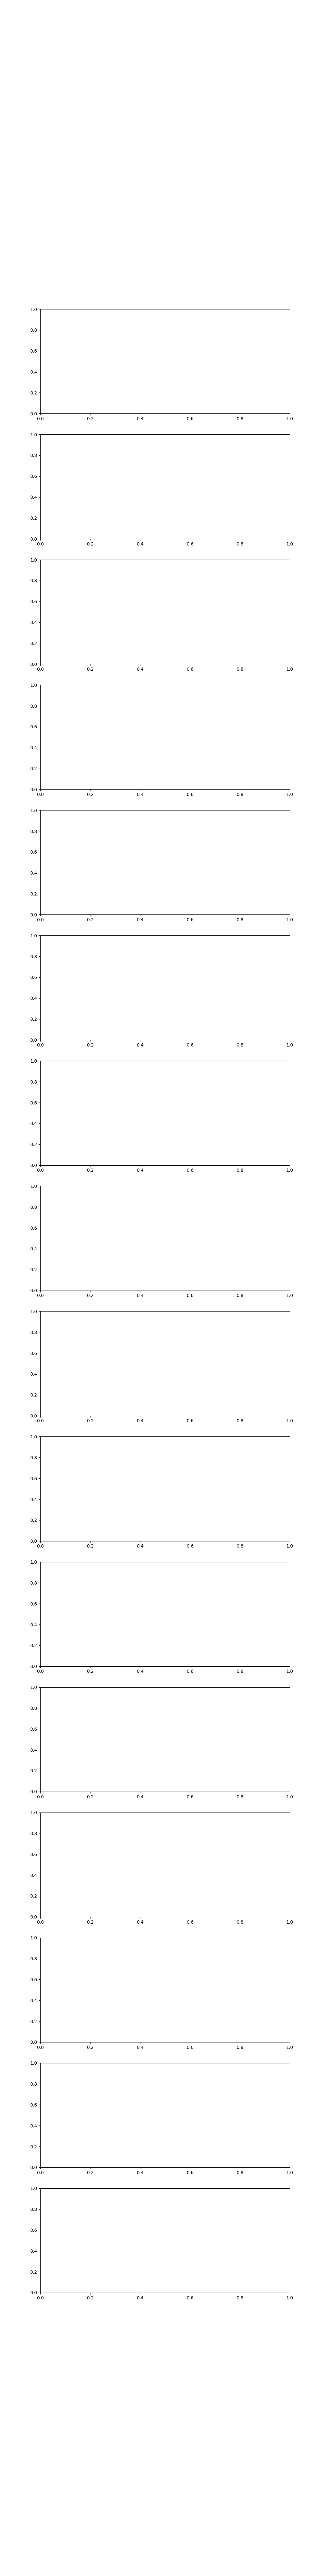

In [99]:
l = len(pr)
print(l)
fig, ax = plt.subplots(l, 1, figsize=(10, 5*l))

In [100]:

for (N, epsilon0, f, e_rng), ax in zip(pr, ax):
    x_c = rng.uniform(-1, 1, N)
    x = np.linspace(-1, 1, N)
    # epsilon = rng.normal(-epsilon0, epsilon0, N)
    epsilon = e_rng(-epsilon0, epsilon0, N)
    ax.plot(x, f(x), "b")
    ax.scatter(x_c, f(x_c) + epsilon, c="r")